# Modelo Logit para Valoración Contingente

En este notebook, estimaremos el modelo Logit utilizando PandasBiogeme, un software estadistico basado en Python para la estimación de modelos de elección. PandasBiogeme también puede ser usado para estimar el modelo dicotómico simple de Valoración Contingente (Logit). PandasBiogeme será también usado para estimar modelos de elección para experimentos de elección.

## Parte 1: Ejecuciones preliminares

### Abrir modulos requeridos

El código detallado abajo permite abrir los modulos base para ejecutar el modelo Logit:

- `Pandas`: Permite abrir y realizar operaciones con bases de datos.
- `Matplotlib`: Permite realizar graficas basadas en datos de Python

In [2]:
# Abrir modulos
import pandas as pd
import matplotlib.pyplot as plt

### Abrir base de datos

La base de datos “clean_energy.xlsx” contiene información sobre las respuestas de la encuesta de valoración contingente “Clean Energy and You”, conducida en Estados Unidos para conocer las preferencias de los ciudadanos por un programa llamado “Green Choice”, cuyo objetivo es el reemplazo de fuentes fósiles de energía por fuentes renovables, además de la plantación de árboles para la compensación de emisiones de CO2. La pregunta de valoración fue formulada en base a una respuesta dicotómica simple, por lo que cada individuo fue consultado si deseaba pagar un monto ofrecido por los encuestadores.

El codigo descrito a continuación permite abrir la base de datos. La base de datos es guardada en un objeto llamado `df`

In [3]:
df = pd.read_excel('clean_energy.xlsx')

A continuación, revisaremos parte de la base de datos ejecutando la base de datos `df`:

In [4]:
df

,ID,Bid,Choice
0,1,100,0
1,2,5,0
2,3,150,0
3,4,1,1
4,5,5,1
...,...,...,...
199,200,20,1
200,201,30,1
201,202,1,1
202,203,30,1


La base de datos consta de 204 filas (respuestas) y tres columnas (variables):

-	ID: Identificador del individuo
-	Bid: Monto ofrecido al individuo
-	Choice: Variable igual a 1 si la persona está dispuesta a pagar el monto ofrecido, y 0 en otro caso

Una vez abierta la base de datos, es posible acceder a cada una de las variables usando la sintaxis descrita a continuación (ej. para la variable `Bid`):

In [5]:
df['Bid']

0      100
1        5
2      150
3        1
4        5
      ... 
199     20
200     30
201      1
202     30
203     20
Name: Bid, Length: 204, dtype: int64

¿Cómo se accede a la variable `Choice`? Escriba la sintaxis a continuación y ejecute la linea:

### Descripción estadistica:

El codigo a continuación permite realizar una descripción rápida de la base de datos `df`:

In [6]:
df.describe()

,ID,Bid,Choice
count,204.000000,204.000000,204.000000
mean,102.500000,60.151961,0.632353
std,59.033889,66.287116,0.483351
min,1.000000,1.000000,0.000000
25%,51.750000,10.000000,0.000000
50%,102.500000,30.000000,1.000000
75%,153.250000,100.000000,1.000000
max,204.000000,200.000000,1.000000


Además, es posible acceder a estadisticos especificos, como por ejemplo, la media de las variables usando el comando `mean()` sobre la base de datos:

In [7]:
df.mean()

ID        102.500000
Bid        60.151961
Choice      0.632353
dtype: float64

¿Cuál es la tasa media de aceptación de los montos ofrecidos?

El comando para acceder a la desviación estandar es `std()`. Calcule la desviación estandar por su cuenta abajo de esta linea:

Además, es posible obtener la frecuencia de cada uno de los valores de una variable en la base de datos. Por ejemplo, para la variable `Bid`:

In [10]:
df['Bid'].value_counts()

20     25
1      24
100    23
5      23
30     22
50     22
10     22
150    21
200    21
2       1
Name: Bid, dtype: int64

Repita el ejercicio con la variable `Choice`:

### Visualización de un histograma

El codigo abajo permite construir un histograma de la variable `Bid`:

(array([95., 22., 22.,  0., 23.,  0.,  0., 21.,  0., 21.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

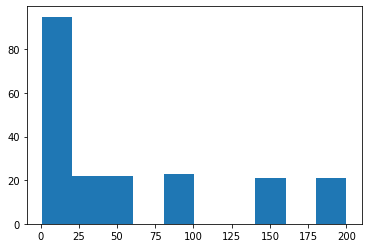

In [8]:
plt.hist(df['Bid'])

Es posible ajustar algunos parametros del histograma, como el numero de barras:

(array([25.,  0., 23.,  0., 22.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0.,
         0., 22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([  1.  ,   2.99,   4.98,   6.97,   8.96,  10.95,  12.94,  14.93,
         16.92,  18.91,  20.9 ,  22.89,  24.88,  26.87,  28.86,  30.85,
         32.84,  34.83,  36.82,  38.81,  40.8 ,  42.79,  44.78,  46.77,
         48.76,  50.75,  52.74,  54.73,  56.72,  58.71,  60.7 ,  62.69,
         64.68,  66.67,  68.66,  70.65,  72.64,  74.63,  76.62,  78.61,
         80.6 ,  82.59,  84.58,  86.57,  88.56,  90.55,  92.54,  94.53,
  

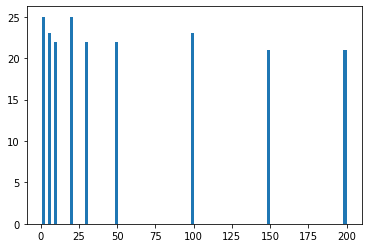

In [13]:
plt.hist(df['Bid'],bins=100)